In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('SoSampleTest.xlsx')

In [3]:
print(df)

    Week Start     Bookings
0   2021-08-01   129.808103
1   2021-08-08   122.962071
2   2021-08-15   153.664518
3   2021-08-22   234.772937
4   2021-08-29   214.594944
..         ...          ...
126 2023-12-31    86.172820
127 2024-01-07   191.243189
128 2024-01-14   228.979605
129 2024-01-21  1085.917765
130 2024-01-28   126.711120

[131 rows x 2 columns]


In [4]:
df.head()

,Week Start,Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [5]:
df.set_index('Week Start',inplace=True)

In [6]:
df.head()

,Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [7]:
df.describe()

,Bookings
count,131.000000
mean,288.372461
std,261.808817
min,72.686246
25%,160.023637
50%,209.594394
75%,289.028204
max,1782.905032


<Axes: xlabel='Week Start'>

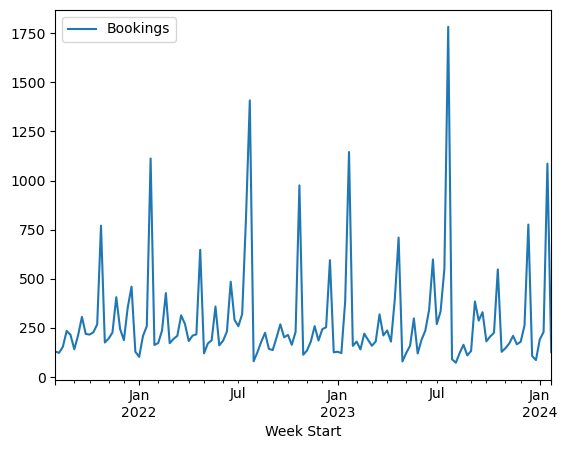

In [8]:
#Step 2. Visualize the Data
df.plot()

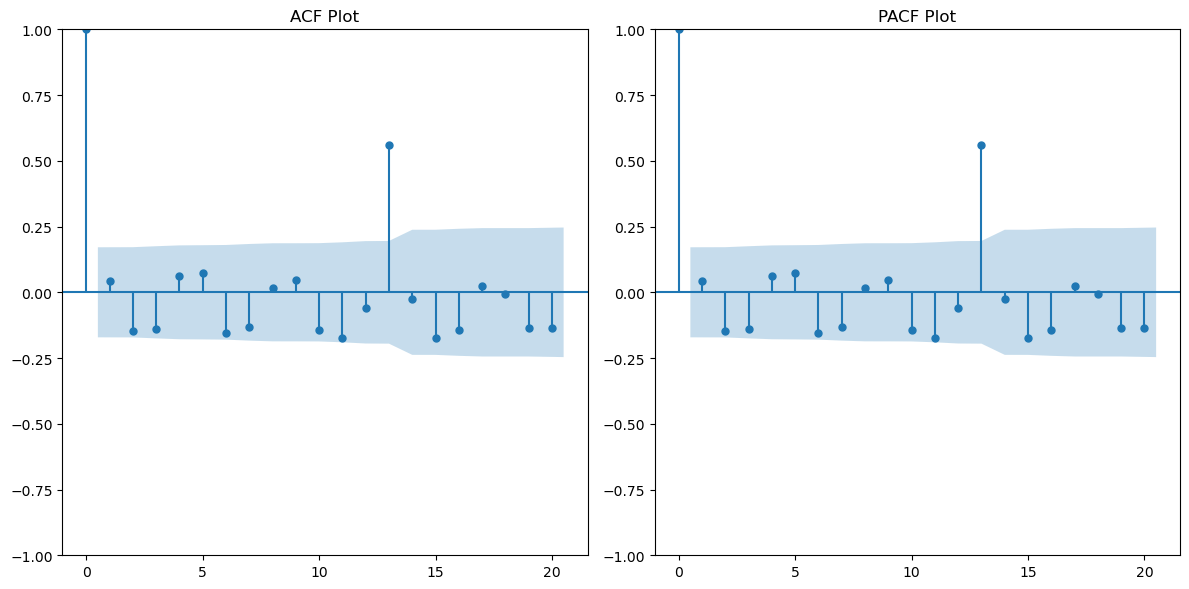

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [10]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [11]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [12]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-3.1663425473241937
p-value:0.022017452406426583
#Lags Used:13
Number of Observations Used:117
Strong evidence against null hypo


In [13]:
### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Bookings'],order=(1,0,1),seasonal_order=(1,0,1,13))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [14]:
results=model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11401D+00    |proj g|=  5.76713D-01

At iterate    5    f=  6.86129D+00    |proj g|=  3.47227D-02

At iterate   10    f=  6.84863D+00    |proj g|=  2.23190D-03

At iterate   15    f=  6.80518D+00    |proj g|=  5.15921D-02

At iterate   20    f=  6.56560D+00    |proj g|=  5.86506D-03

At iterate   25    f=  6.55929D+00    |proj g|=  1.22756D-03

At iterate   30    f=  6.53331D+00    |proj g|=  5.56685D-02

At iterate   35    f=  6.52581D+00    |proj g|=  1.09935D-03

At iterate   40    f=  6.52581D+00    |proj g|=  3.31620D-04

At iterate   45    f=  6.52578D+00    |proj g|=  3.51292D-03

At iterate   50    f=  6.52515D+00    |proj g|=  4.93716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Week Start'>

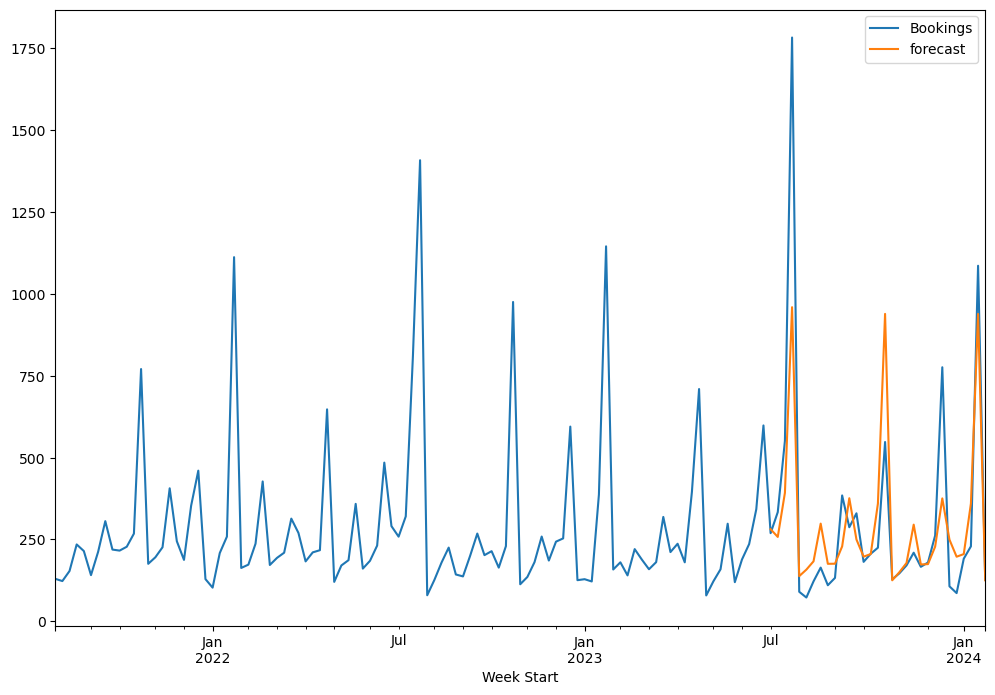

In [15]:
df['forecast']=results.predict(start=100, end = 130, dynamic=True) # testing the model performance with sample input
df[['Bookings','forecast']].plot(figsize=(12,8))

In [16]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,26)] # Creating future weeks- 26 weeks placeholder

In [17]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [18]:
future_dataset_df.head()

,Bookings,forecast
Week Start,,
2024-02-04,NaN,NaN
2024-02-11,NaN,NaN
2024-02-18,NaN,NaN
2024-02-25,NaN,NaN
2024-03-03,NaN,NaN


In [19]:
future_df=pd.concat([df,future_dataset_df])

/var/folders/qg/9qnm2g51701gxcxzzwr1q97c0000gn/T/ipykernel_3396/674726799.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


<Axes: xlabel='Week Start'>

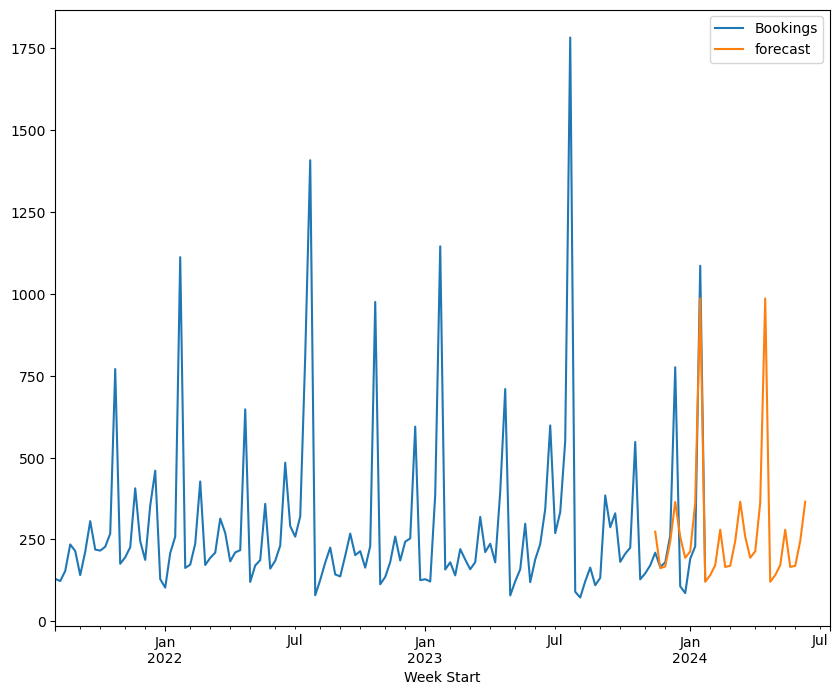

In [20]:
future_df['forecast']=results.predict(start=120, end=150, dynamic=True)
future_df[['Bookings','forecast']].plot(figsize=(10,8))

In [21]:
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the bookings for the last weeks
print(future_df1)

               Bookings    forecast
Week Start                         
2023-11-19   209.594394  273.907142
2023-11-26   166.480645  162.376107
2023-12-03   179.642179  167.371652
2023-12-10   262.158393  243.786008
2023-12-17   775.903533  364.562071
2023-12-24   106.904772  257.890199
2023-12-31    86.172820  193.886442
2024-01-07   191.243189  213.619520
2024-01-14   228.979605  362.105048
2024-01-21  1085.917765  986.135702
2024-01-28   126.711120  120.686342
2024-02-04          NaN  141.050861
2024-02-11          NaN  171.329668
2024-02-18          NaN  279.661104
2024-02-25          NaN  165.966778
2024-03-03          NaN  169.603131
2024-03-10          NaN  245.160092
2024-03-17          NaN  365.391827
2024-03-24          NaN  258.403900
2024-03-31          NaN  194.202646
2024-04-07          NaN  213.804807
2024-04-14          NaN  362.191066
2024-04-21          NaN  986.091121
2024-04-28          NaN  120.722434
2024-05-05          NaN  141.064879
2024-05-12          NaN  171

In [23]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1_selected_cols=future_df1[['Bookings','forecast']]

# Remove the time part from the index by formatting it as date only
future_df1_selected_cols.index = future_df1_selected_cols.index.strftime('%Y-%m-%d')

future_df1_selected_cols.to_excel('output3Y.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...


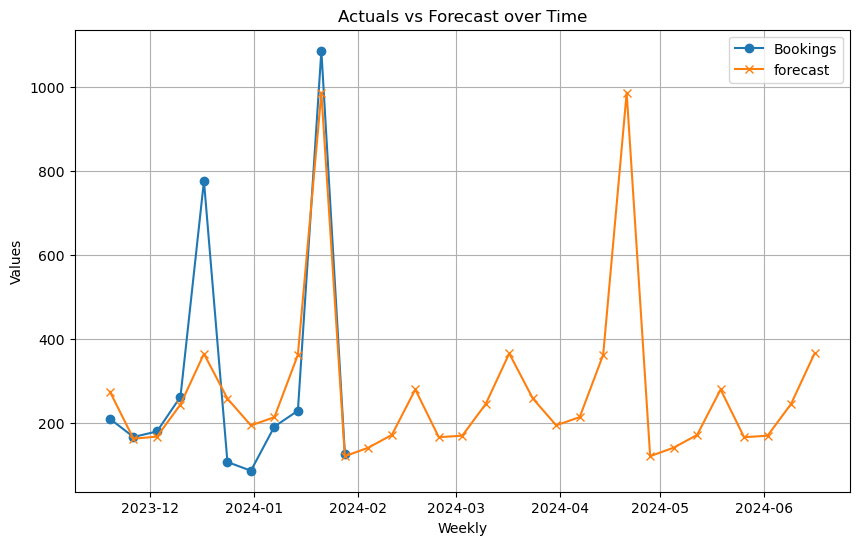

In [24]:
# Plot the Actuals vs Forecast

plt.figure(figsize=(10, 6))
plt.plot(future_df1.index, future_df1['Bookings'], label='Bookings', marker='o')
plt.plot(future_df1.index, future_df1['forecast'], label='forecast', marker='x')

# Customize the graph
plt.title('Actuals vs Forecast over Time')
plt.xlabel('Weekly')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='upper right')

# Save the plot to a PNG file. Needs to save first before plotting the graph
plt.savefig('actuals_forecast_2022_2024.png')

# Show the plot 
plt.show()

In [25]:
import openpyxl
from openpyxl.drawing.image import Image

# Load the workbook and select the active worksheet
wb = openpyxl.load_workbook('output3Y.xlsx')
ws = wb.active #worksheet activated 

# Add the saved image to the worksheet
img = Image('actuals_forecast_2022_2024.png')
ws.add_image(img, 'G5')  # Insert the image starting from cell G5

# Save the updated Excel file
wb.save('actuals_forecast_2022_2024.xlsx')

In [26]:
### Draw Line chart graph in excel and save it.

import xlsxwriter

# Create an Excel writer object and use xlsxwriter as the engine
with pd.ExcelWriter('Output_SARIMA.xlsx', engine='xlsxwriter') as writer:
    
    
    # Write the DataFrame to Excel
    future_df1_selected_cols.to_excel(writer, sheet_name='Sheet1', index=True)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']
    
    # Create a chart object (line chart)
    chart = workbook.add_chart({'type': 'line'})

    # Configure the first series (Actuals)
    chart.add_series({
        'name': 'Bookings',
        'categories': ['Sheet1', 1, 0, 42, 0],  # (sheet_name, start_row=1, start_col=0 always, end_row=42, end_col=0 always)
        'values': ['Sheet1', 1, 1, 42, 1],      # (sheet_name, start_row=1, start_col=1, end_row=42, end_col)
    })

    # Configure the second series (Forecast)
    chart.add_series({
        'name': 'forecast',
        'categories': ['Sheet1', 1, 0, 42, 0],  # Date column for categories
        'values': ['Sheet1', 1, 2, 42, 2],      # Forecast values (row 1 to 42, column 2)
    })

    # Add a chart title and axis labels
    chart.set_title({'name': 'Actuals vs Forecast'})
    chart.set_x_axis({'name': 'Weekly'})
    chart.set_y_axis({'name': 'Values'})
    
    # Set a fixed size for the chart (width and height in pixels)
    chart.set_size({'width': 1000, 'height': 600})  # You can adjust these values
    
    # Insert the chart into the worksheet
    worksheet.insert_chart('E2', chart)